In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
G = nx.karate_club_graph()

In [3]:
G

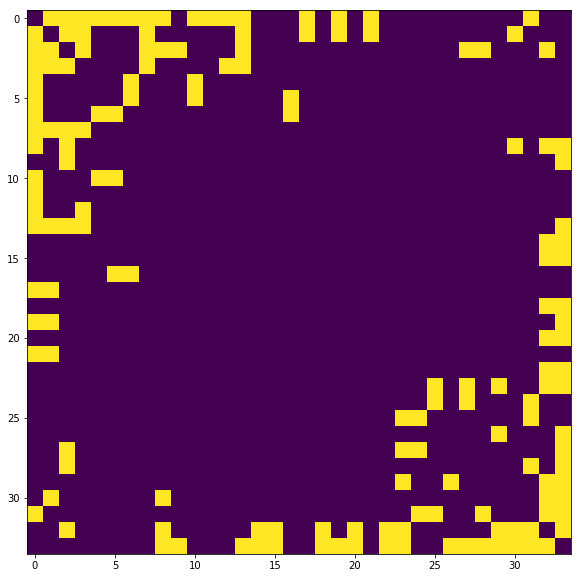

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(np.array(nx.adj_matrix(G).todense()));

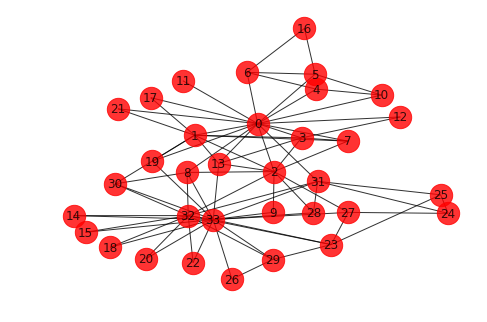

In [4]:
nx.draw_kamada_kawai(G, 
        #cmap = plt.get_cmap('Reds'), 
        #node_color=colorList, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

In [ ]:
nx.spring_layout()

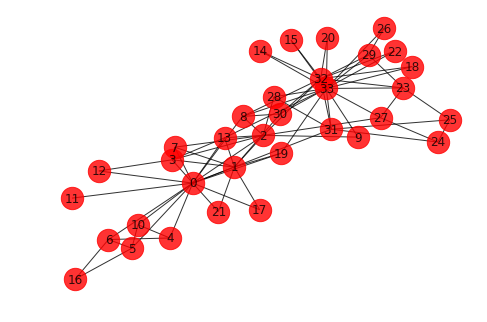

In [16]:
nx.draw(G, 
        #cmap = plt.get_cmap('Reds'), 
        #node_color=colorList, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

In [21]:
from igraph import Graph
from igraph import ADJ_MAX

sudo apt-get install -y libigraph0-dev
pip install python-igraph

In [22]:
G_igraph = Graph.Weighted_Adjacency(
                np.array(nx.adj_matrix(G).todense()).tolist(),
                mode=ADJ_MAX,
                attr='weight')

In [23]:
levels = G_igraph.community_multilevel(
            weights='weight',
            return_levels=True)
        
levels = np.array([level.membership for level in levels]).astype(int)
n_steps = len(levels)
labels_louvain = np.array(levels[-1])

In [24]:
labels_louvain

array([1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1,
       3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3])

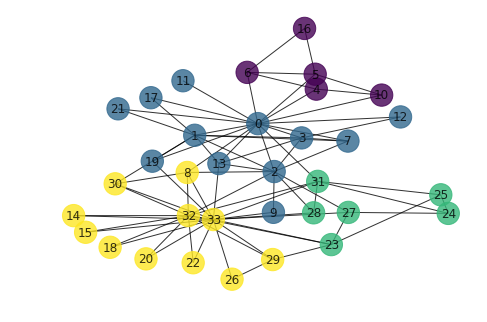

In [16]:
nx.draw_kamada_kawai(G, 
        #cmap = plt.get_cmap('Reds'), 
        node_color=labels_louvain, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

In [30]:
labels = G_igraph.community_leading_eigenvector(
            clusters=4,
            weights='weight').membership
labels_eig = np.array(labels)

In [31]:
labels_eig

array([0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

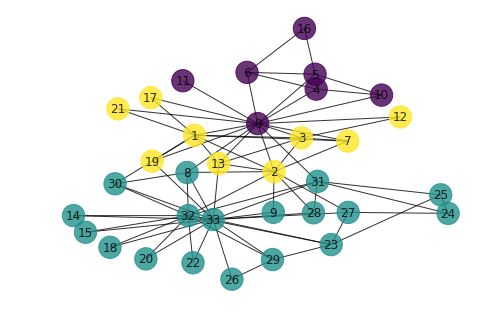

In [32]:
nx.draw_kamada_kawai(G, 
        #cmap = plt.get_cmap('Reds'), 
        node_color=labels_eig, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

In [ ]:
labels_eig

In [37]:
adj = np.array(nx.adj_matrix(G).todense())

In [38]:
order = np.argsort(labels_eig)

In [39]:
order

array([ 0, 11, 10,  6,  5, 16,  4, 33, 22, 25, 20, 18, 26, 32, 23, 15, 27,
       28, 29, 30,  9,  8, 31, 14, 24,  3, 17, 13, 12,  1,  2,  7, 21, 19])

In [40]:
labels_eig[order]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

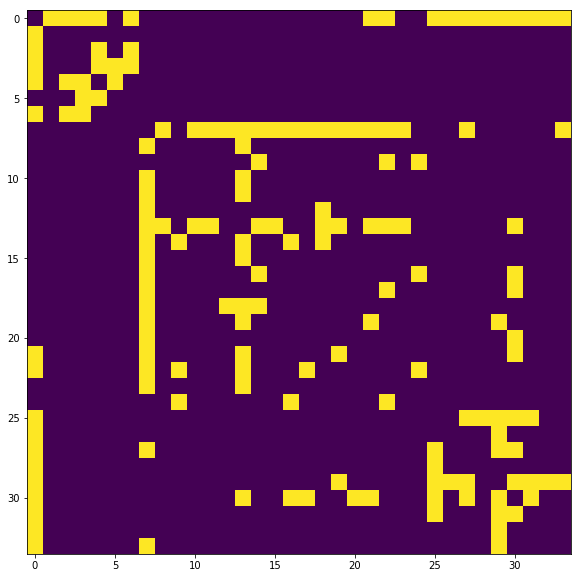

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(adj[:, order][order,:])

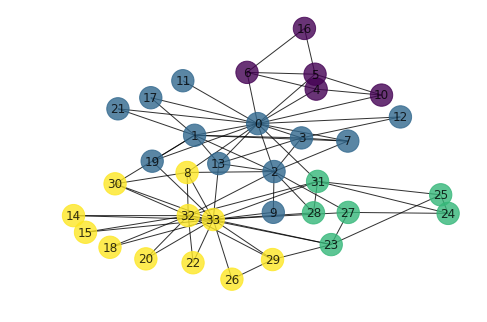

In [33]:
nx.draw_kamada_kawai(G, 
        #cmap = plt.get_cmap('Reds'), 
        node_color=labels_louvain, 
        node_size=500, 
        alpha=0.8, 
        with_labels=True)

In [34]:
from sklearn.metrics import adjusted_mutual_info_score

In [36]:
adjusted_mutual_info_score(labels_louvain, labels_eig)

adjusted_mutual_info_score(labels_eig, labels_eig)

1.0

In [43]:
G_igraph.modularity(labels_eig)

0.37269888231426695

In [44]:
G_igraph.modularity(labels_louvain)

0.41880341880341887

In [ ]:
modularity = graph.modularity(test.membership, weights='weight')
        partition = np.array(partition.membership)

In [ ]:
partition = graph.community_optimal_modularity(weights='weight')
modularity = graph.modularity(test.membership, weights='weight')
partition = np.array(partition.membership)

In [45]:
import community

In [46]:
G

In [51]:
labels_louvain2 = np.array(list(community.best_partition(G).values()))

In [52]:
adjusted_mutual_info_score(labels_louvain, labels_louvain2)

1.0

In [53]:
labels_louvain

array([1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 0, 1, 1, 1, 3, 3, 0, 1, 3, 1, 3, 1,
       3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3])

In [54]:
labels_louvain2

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2])